# Spam message Classification
### Thomas Knickerbocker

## Import libraries, load data, use k-means and display via confusion matrix:

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import time
import re

# Load dataset
df = pd.read_csv('http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv')

# Convert text data into numerical vectors
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['msg'])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(X)

# Evaluate clustering performance
labels = kmeans.labels_
actual_labels = [1 if x == 'spam' else 0 for x in df['type']]
c_matrix = confusion_matrix(actual_labels, labels)
report = classification_report(actual_labels, labels)

# Print results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)


Confusion Matrix:
 [[3442 1184]
 [ 589   86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.80      4626
           1       0.07      0.13      0.09       675

    accuracy                           0.67      5301
   macro avg       0.46      0.44      0.44      5301
weighted avg       0.75      0.67      0.71      5301



### Compare these results to using Agglomerative clustering

Agglomerative clustering starts with each point as its own cluster then merges the two nearest clusters over and over again until there are 2 clusters left (in this case)

In [3]:
# Convert text data into numerical vectors
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['msg'])

# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X.toarray())

# Evaluate the clustering performance
labels = agg.labels_
actual_labels = [1 if x == 'spam' else 0 for x in df['type']]
c_matrix = confusion_matrix(actual_labels, labels)
report = classification_report(actual_labels, labels)

# Print results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)

Confusion Matrix:
 [[4595   31]
 [ 675    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      4626
           1       0.00      0.00      0.00       675

    accuracy                           0.87      5301
   macro avg       0.44      0.50      0.46      5301
weighted avg       0.76      0.87      0.81      5301



Agglomerative clustering performs worse than K-means clustering, as it classifies none of the data points as spam. It's accuracy is higher, but the precision, recall, and F1-score are all 0. 

## Quality Analysis

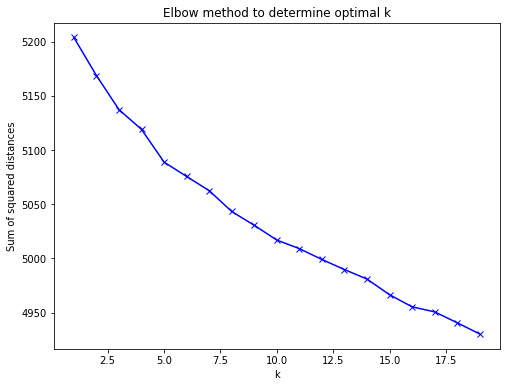

In [21]:
# Elbow method to determine optimal number of clusters
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method to determine optimal k')
plt.show()

Using the elbow test here, I am going to opt for 10 clusters. Although, there isn't a clear point for this dataset.

## Create term frequency vectorizer, see prevalence of spam messages by cluster:

In [27]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['msg'])

# Cluster the data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, init='random')
kmeans.fit(X)

# Get the cluster labels and the actual labels
labels = kmeans.labels_
actual_labels = np.where(df['type'] == 'spam', 1, 0)

# Get the indices of the messages in each cluster
clusters = [np.where(labels == 0)[0],
            np.where(labels == 1)[0],
            np.where(labels == 2)[0],
            np.where(labels == 3)[0],
            np.where(labels == 4)[0],
            np.where(labels == 5)[0],
            np.where(labels == 6)[0],
            np.where(labels == 7)[0],
            np.where(labels == 8)[0],
            np.where(labels == 9)[0]]


# Calculate the percentage of spam messages in each cluster
spam_percentages = [np.mean(actual_labels[clusters[0]]),
                    np.mean(actual_labels[clusters[1]]),
                    np.mean(actual_labels[clusters[2]]),
                    np.mean(actual_labels[clusters[3]]),
                    np.mean(actual_labels[clusters[4]]),
                    np.mean(actual_labels[clusters[5]]),
                    np.mean(actual_labels[clusters[6]]),
                    np.mean(actual_labels[clusters[7]]),
                    np.mean(actual_labels[clusters[8]]),
                    np.mean(actual_labels[clusters[9]])]

# Print the percentage of spam messages in each cluster
print('Percentage of spam messages in each cluster:')
print('Cluster 1:', spam_percentages[0])
print('Cluster 2:', spam_percentages[1])
print('Cluster 3:', spam_percentages[2])
print('Cluster 4:', spam_percentages[3])
print('Cluster 5:', spam_percentages[4])
print('Cluster 6:', spam_percentages[5])
print('Cluster 7:', spam_percentages[6])
print('Cluster 8:', spam_percentages[7])
print('Cluster 9:', spam_percentages[8])
print('Cluster 10:', spam_percentages[9])

Percentage of spam messages in each cluster:
Cluster 1: 0.0103359173126615
Cluster 2: 0.0
Cluster 3: 0.0
Cluster 4: 0.8464912280701754
Cluster 5: 0.5834683954619124
Cluster 6: 0.0
Cluster 7: 0.03377735490009515
Cluster 8: 0.01832460732984293
Cluster 9: 0.0481283422459893
Cluster 10: 0.013953488372093023


## Displaying each cluster as a word cloud
word clouds display more frequently seen tokens (in this case, words) as larger text. This can give us an immediate and apparent visualization of the similarity groupings of each cluster

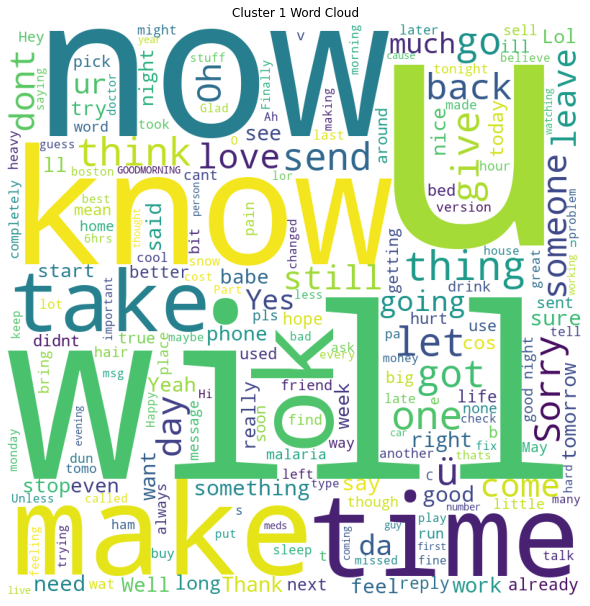

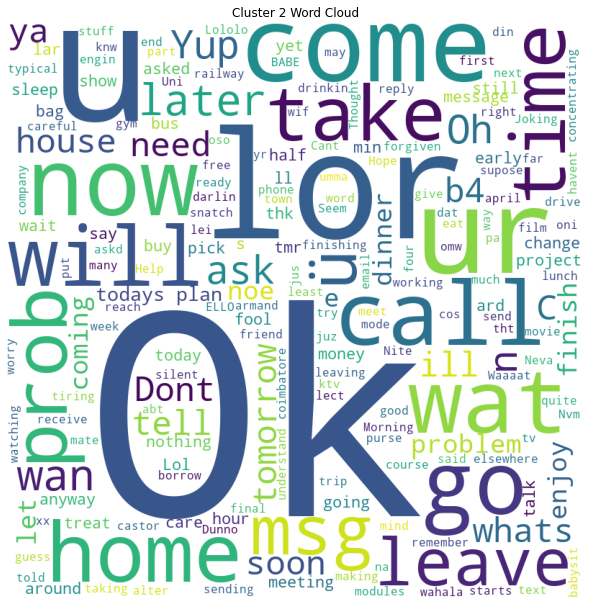

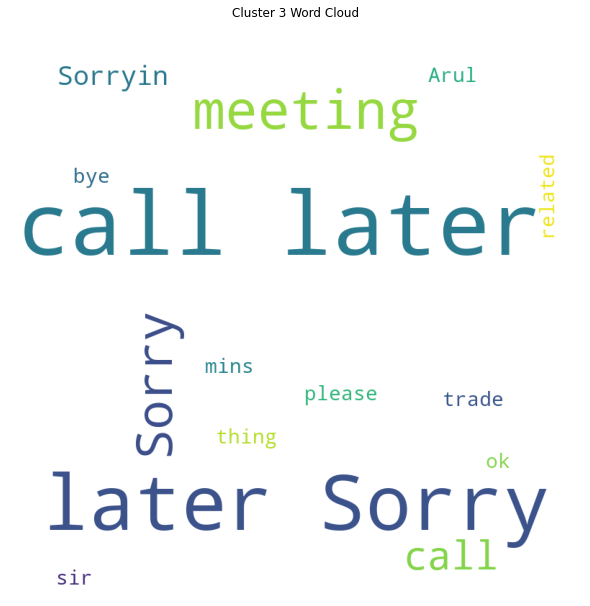

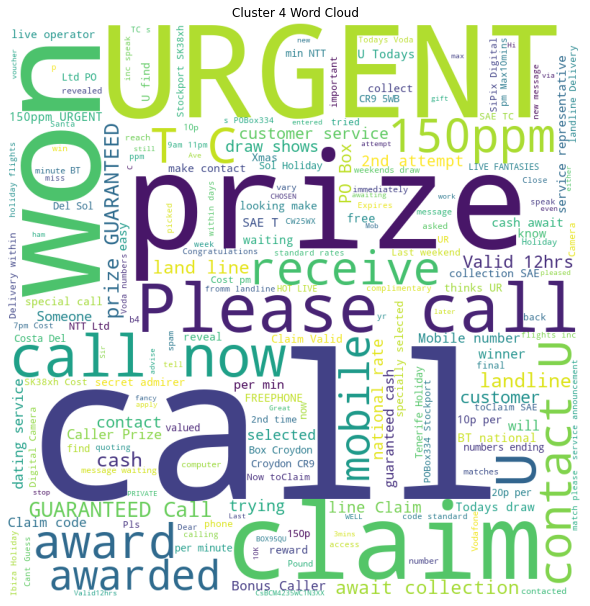

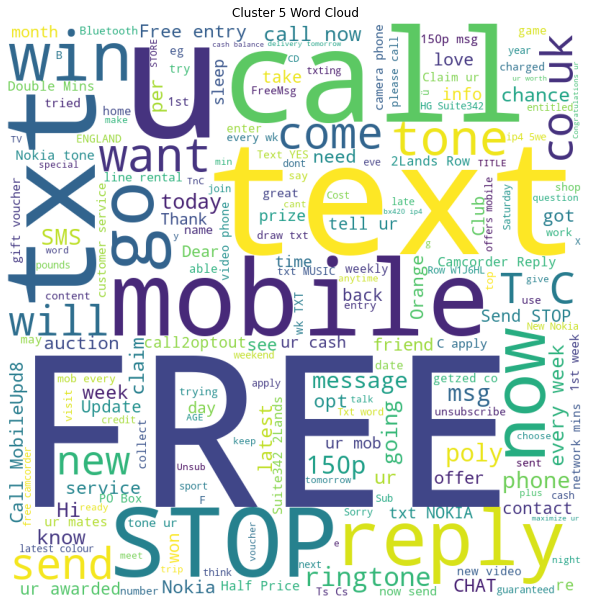

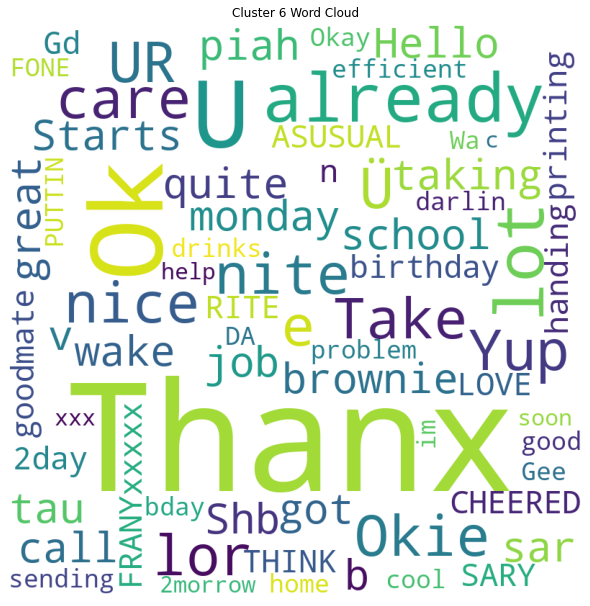

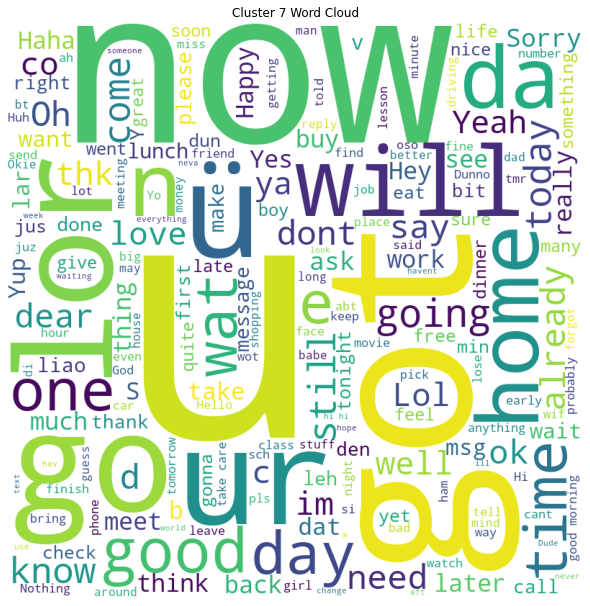

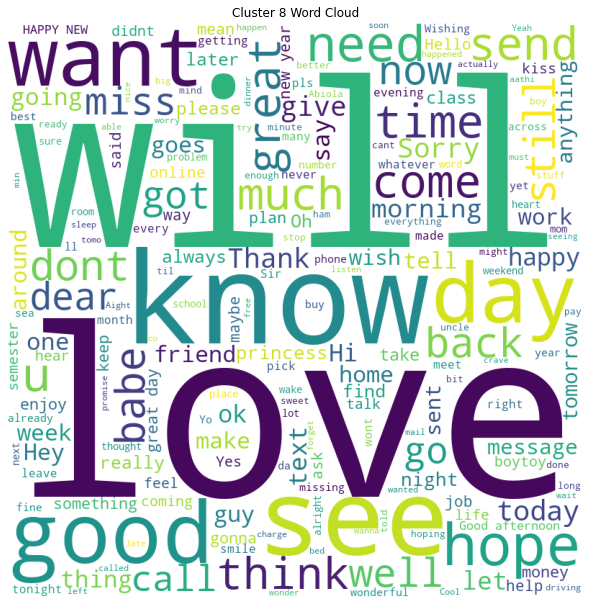

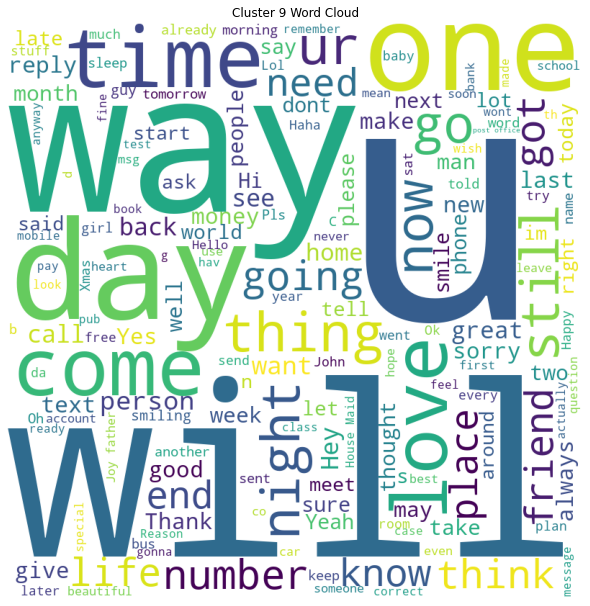

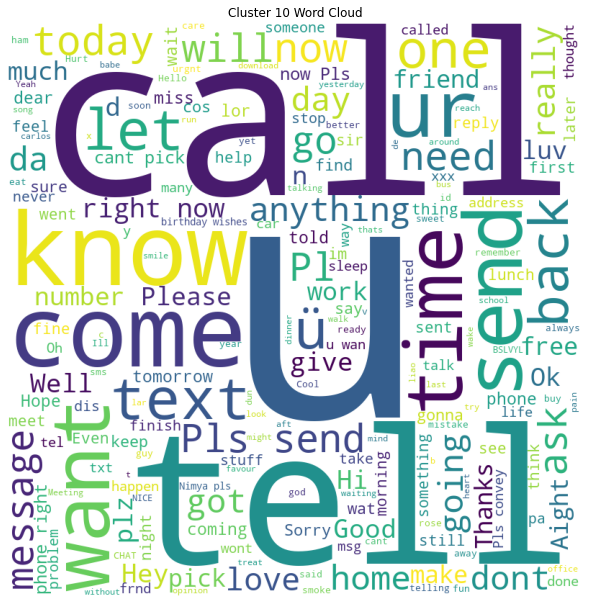

In [28]:
# Generate word clouds for each cluster
for i in range(num_clusters):
    cluster_text = ' '.join(df.loc[kmeans.labels_ == i, 'msg'])
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(cluster_text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f"Cluster {i+1} Word Cloud")
    plt.show()

## A few messages from each cluster (for reference):

In [29]:
for i in range(num_clusters):
    # Get indices of messages in cluster i
    indices = np.where(kmeans.labels_ == i)[0]
    
    # Get text in cluster i
    text = df.loc[indices, 'msg']
    
    # Print representative messages from cluster i
    print(f'\nCluster {i+1}:')
    for j in range(min(len(text), 5)):
        print(f'{j+1}. {text.iloc[j]}')
    
    # Print total cluster size
    print(f'Total size: {len(text)}')
    
    # Calculate percentage of spam messages in cluster i
    spam_count = df.loc[indices, 'type'].value_counts().get('spam', 0)
    spam_percentage = spam_count / len(text) * 100
    print(f'Percentage spam: {spam_percentage:.2f}%')


Cluster 1:
1. FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send £1.50 to rcv
2. Ahhh. Work. I vaguely remember that! What does it feel like? Lol
3. Yeah hopefully if tyler can't do it I could maybe ask around a bit
4. Sorry my roommates took forever it ok if I come by now?
5. Yes I started to send requests to make it but pain came back so I'm back in bed. Double coins at the factory too. I gotta cash in all my nitros.
Total size: 387
Percentage spam: 1.03%

Cluster 2:
1. Ok lar... Joking wif u oni...
2. Ok... Ur typical reply...
3. U call me alter at 11 ok.
4. Ok no prob. Take ur time.
5. I asked you to call him now ok
Total size: 144
Percentage spam: 0.00%

Cluster 3:
1. Sorry I'll call later in meeting.
2. Sorry I'll call later
3. Sorry I'll call later
4. Sorry I'll call later
5. Sorry I'll call later
Total size: 44
Percentage spam: 0.00%

Cluster 4:
1. WINNER!! As a valued network customer you have 

### Some outliers (spam messages within primarily non-spam clusters)
Note that the term "non-spam" is not based on majority here, since our dataset contains 90% non-spam and 10% spam messages by volume. Thus, we might not expect any clusters to have a **majority** of their messages to be spam, even. But we can (and did) see the composition of clusters earlier, so we are basing our appraisals on that

In [44]:
# Spam messages in non-spam cluster
for i in range(len(clusters[6])):
    # used i+10 here because otherwise the message will be the same as the message printed from the next for loop
    if (df.iloc[i+10]['type'] == 'spam'):
      print('Spam message in non-spam cluster:\n', df.iloc[i+10]['msg'])
      break

for i in range(len(clusters[7])):
    if (df.iloc[i]['type'] == 'spam'):
      print('Spam message in non-spam cluster:\n', df.iloc[i]['msg'])
      break

# Non-spam messages in spam cluster
for i in range(len(clusters[3])):
    # used i+10 here because otherwise the message will be the same as the message printed from the next for loop
    if (df.iloc[i+10]['type'] == 'ham'):
      print('Non-spam message in spam cluster:\n', df.iloc[i+10]['msg'])
      break

for i in range(len(clusters[4])):
    if (df.iloc[i]['type'] == 'ham'):
      print('Non-spam message in spam cluster:\n', df.iloc[i]['msg'])
      break

Spam message in non-spam cluster:
 SIX chances to win CASH! From 100 to 20000 pounds txt> CSH11 and send to 87575. Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info
Spam message in non-spam cluster:
 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Non-spam message in spam cluster:
 I'm gonna be home soon and i don't want to talk about this stuff anymore tonight k? I've cried enough today.
Non-spam message in spam cluster:
 Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


## New texts and my predictions:

- I believe the first text will be in cluster 8. I noticed lots of questions and casual conversation in that cluster.

- I believe the second text will be in cluster 3 because it comprised of mostly texts of this exact format.

- I believe the third and fourth texts will be in either cluster 4 or 5 because these are the clusters with lots of spam messages in them.

In [31]:
# Define 4 new texts that are not in the training data
new_texts = [
    'How are you doing? I will lyk later bro',
    'Sorry, I should call later',
    'Free entry to the jackpot $1M congratulations!',
    'YOU WIN! Please call 1234567890 to get your reward!'
]

# Vectorize the new texts using the same vectorizer used for the training data
new_X = tfidf.transform(new_texts)

# Predict the cluster labels for the new texts
new_labels = kmeans.predict(new_X)

# Compute the distances between each new text and the cluster centers
distances = euclidean_distances(new_X, kmeans.cluster_centers_)

# Print the results for each new text
for i in range(len(new_texts)):
    print(f'Text: {new_texts[i]}')
    print(f'Cluster label: {new_labels[i] + 1}')
    print(f'Distances to clusters: {distances[i]}')
    print()

Text: How are you doing? I will lyk later bro
Cluster label: 8
Distances to clusters: [1.01553313 1.09792717 1.2168499  1.02624567 1.0129366  1.16292823
 0.99588246 0.9697634  1.00862709 1.01490063]

Text: Sorry, I should call later
Cluster label: 3
Distances to clusters: [1.02112792 1.09509714 0.72531763 0.98524833 1.00683883 1.16047194
 0.99787118 1.02119564 1.01531575 1.01301448]

Text: Free entry to the jackpot $1M congratulations!
Cluster label: 5
Distances to clusters: [1.02105256 1.10292561 1.34162054 1.02952758 0.97673088 1.16292823
 1.00302365 1.02236095 0.98639663 1.01848914]

Text: YOU WIN! Please call 1234567890 to get your reward!
Cluster label: 4
Distances to clusters: [1.01092551 1.09561626 1.2632154  0.94386745 0.96333711 1.1611215
 0.99538567 0.97523343 1.00418557 0.99382698]



My predictions proved to be accurate.

# 3. PCA on dataset:

In [2]:
df['ID'] = df.index
# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame with the principal components and type labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['type'] = df['type']
df_pca['ID'] = df.index

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='type', hover_data=['ID'])

fig.show()

### b. Two points that are classified as spam but aren't close to other spam messages in the 3D graph, for reference:

In [22]:
df[df['ID'] == 4040]


,type,msg,cluster,ID
4040,spam,accordingly. I repeat just text the word ok on...,5,4040


In [23]:
df[df['ID'] == 5]

,type,msg,cluster,ID
5,spam,FreeMsg Hey there darling it's been 3 week's n...,2,5


Both of these messages contain more normal messages and are less spammy, with a conversational tone that distinguishes them from regular spam messages. This is why I believe they are further out of the spam cluster.

In [26]:
# Using  vectorizer from part 1
num_features = len(tfidf.get_feature_names())
print('Total number of features:', num_features)

Total number of features: 8349


In [ ]:
# Fit PCA to the feature matrix X
pca = PCA()
pca.fit(X.toarray())


# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

: 

NOTE: From this, we can see that 300-400 components will be needed in order to capture over 50% of the variance in the data

# Dimensionality Reduction and Classification

### 1-NN using vectorized data

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['type'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
# Create 1-NN classifier using full vectorized features directly
knn_full = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
knn_full.fit(X_train_vec, y_train)
full_vec_time = time.time() - start_time
y_pred_full = knn_full.predict(X_test_vec)

# Evaluate performance of full vectorized 1-NN classifier
c_matrix = confusion_matrix(y_test, y_pred_full)
report = classification_report(y_test, y_pred_full)

# Print the results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)
print("Runtime:", full_vec_time)

Confusion Matrix:
 [[1372    0]
 [  75  144]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1372
        spam       1.00      0.66      0.79       219

    accuracy                           0.95      1591
   macro avg       0.97      0.83      0.88      1591
weighted avg       0.96      0.95      0.95      1591

Runtime: 0.006914854049682617


### 1-NN using low-dimensional data

In [27]:
# Create 1-NN classifier using low-dimensional space features
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_vec.toarray())
X_test_pca = pca.transform(X_test_vec.toarray())
knn_pca = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
knn_pca.fit(X_train_pca, y_train)
pca_time = time.time() - start_time
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate performance of full vectorized 1-NN classifier
c_matrix = confusion_matrix(y_test, y_pred_pca)
report = classification_report(y_test, y_pred_pca)

# Print the results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)
print("Runtime:", pca_time)

Confusion Matrix:
 [[1332   40]
 [  35  184]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.97      0.97      1372
        spam       0.82      0.84      0.83       219

    accuracy                           0.95      1591
   macro avg       0.90      0.91      0.90      1591
weighted avg       0.95      0.95      0.95      1591

Runtime: 0.006810665130615234


*   Runtime of full vectorized classifier: 0.00691s
*   Runtime of low-dimensional classifier: 0.00681s
*   Accuracy of full vectorized classifier: 0.95
*   Accuracy of low-dimensional classifier: 0.95
*   F1-score of full vectorized classifier: 0.79
*   F1-score of low-dimensional classifier: 0.83

I chose to use 50 components in the PCA here because it was less than the number of components needed to account for over 50% of the variance in the data, and it is not too low such that it doesn't explain enough variance.
Using PCA here helps us speed up our computational time by reducing the dimensionality of the data, extracting only the top 50 "principal components" in this case.

# Spam Classification
## Count Vectorizer (without stemming):

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['type'], test_size=0.3, random_state=42)

# Initialize a CountVectorizer with the stemmer
vectorizer = CountVectorizer(min_df=1, stop_words='english')

# Fit the vectorizer on the training data and transform both the training and testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict the labels of the testing data
y_pred = model.predict(X_test_vec)

c_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)

Confusion Matrix:
 [[1372    0]
 [  38  181]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1372
        spam       1.00      0.83      0.91       219

    accuracy                           0.98      1591
   macro avg       0.99      0.91      0.95      1591
weighted avg       0.98      0.98      0.98      1591



Justifications for approach:
- I used a Count Vectorizer rather thana TF-IDF vectorizer because the spam messages are not that long so the document and term frequency may not have much of an effect. In addition to this, spam messages likely use similar language multiple times in the same message, and the count vectorizer will pick up on such things.

- I chose not to use a stemmer because in text messages, shortened language is used and these meanings may be altered from what they were intended to be.

- I chose to use logistic regression as the model on this dataset because it is efficient even in high dimensional space. It can defend against overfitting with high dimensional data (whereas 1-NN may overfit too much with this data). Along with this, it is great to use on binary classification problems such as detecting if a text message is spam or not.

### TF-IDF Vectorizer with Stemming

In [12]:
# Preprocess the data by applying stemming and removing special characters and numbers
stemmer = SnowballStemmer('english')
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Apply stemming
    return text

df['msg'] = df['msg'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['type'], test_size=0.3, random_state=42)

# Create a TF-IDF vectorizer with stemming
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (stemmer.stem(w) for w in analyzer(doc))
        
vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')

# Fit the vectorizer on the training data and transform both the training and testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict the labels of the testing data
y_pred = model.predict(X_test_vec)

c_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print('Confusion Matrix:\n', c_matrix)
print('Classification Report:\n', report)

Confusion Matrix:
 [[1369    3]
 [  70  149]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1372
        spam       0.98      0.68      0.80       219

    accuracy                           0.95      1591
   macro avg       0.97      0.84      0.89      1591
weighted avg       0.96      0.95      0.95      1591



NOTE: Precision, recall, accuracy, and F1-score were all worse when using TF-IDF and stemming on this dataset. This makes intuitive sense, as abbreviated language and slang variants of words, along with grammatical and spelling errors are typically more frequently seen in spam messages than non-spam, so including words as they originally were in the dataset without the use of stemming is more optimal for our model.